<a href="https://colab.research.google.com/github/amansandhu408/deep-learning/blob/main/BatchGD_vs_StochasticGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
import kagglehub
path = kagglehub.dataset_download("akram24/social-network-ads")

100%|██████████| 3.27k/3.27k [00:00<00:00, 7.16MB/s]

Extracting files...


In [3]:
print(path)

/root/.cache/kagglehub/datasets/akram24/social-network-ads/versions/1


In [4]:
import os

os.listdir(path)

['Social_Network_Ads.csv']

In [5]:
import pandas as pd

csv_path = os.path.join(path, "Social_Network_Ads.csv")
df = pd.read_csv(csv_path)

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df = df[['Age','EstimatedSalary','Purchased']]

In [7]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled.shape

(400, 2)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7079 - loss: 0.6433 - val_accuracy: 0.4250 - val_loss: 0.6885
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7225 - loss: 0.4678 - val_accuracy: 0.7125 - val_loss: 0.5737
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8586 - loss: 0.3413 - val_accuracy: 0.7750 - val_loss: 0.4952
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8352 - loss: 0.3207 - val_accuracy: 0.8500 - val_loss: 0.4220
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8730 - loss: 0.2659 - val_accuracy: 0.8875 - val_loss: 0.3749
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8666 - loss: 0.2885 - val_accuracy: 0.9000 - val_loss: 0.3461
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8548 - loss: 0.3055 - val_accuracy: 0.9125 - val_loss: 0.3175
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8566 - loss: 0.3194 - val_accu

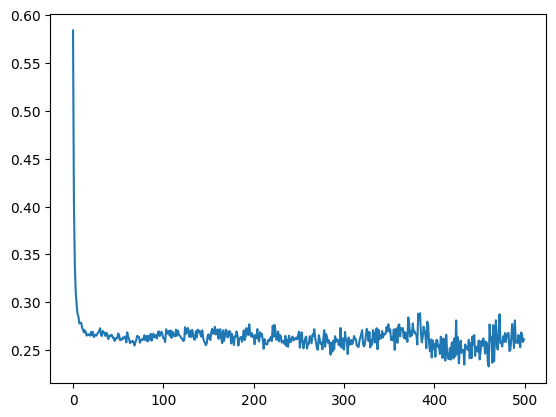

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [17]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.3030 - loss: 0.6854 - val_accuracy: 0.6625 - val_loss: 0.6368
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4808 - loss: 0.6724 - val_accuracy: 0.6375 - val_loss: 0.6357
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5776 - loss: 0.6637 - val_accuracy: 0.6500 - val_loss: 0.6343
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6378 - loss: 0.6577 - val_accuracy: 0.6750 - val_loss: 0.6332
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7241 - loss: 0.6520 - val_accuracy: 0.6625 - val_loss: 0.6325
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8006 - loss: 0.6447 - val_accuracy: 0.6500 - val_loss: 0.6321
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8322 - loss: 0.6398 - val_accuracy: 0.6125 - val_loss: 0.6318
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8343 - loss: 0.6358 - val_accuracy: 0.6250 - val_loss: 0.6310

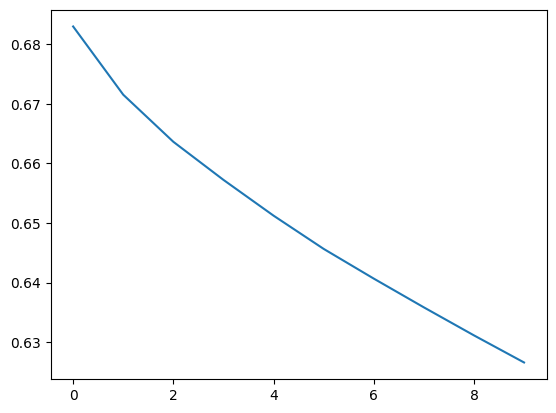

In [19]:
plt.plot(history.history['loss'])